# DataJoint U24 Workflow Session

This notebook will describe the steps to explore the lab and animal management tables created by the elements.   
Prior to using this notebook, please refer to the README for the installation instructions.

In [1]:
# change to the upper level folder to detect dj_local_conf.json
import os
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
import datajoint as dj
dj.conn()

Connecting root@localhost:3306


DataJoint connection (connected) root@localhost:3306

Importing the module `workflow_session.pipeline` is sufficient to create tables inside the elements. This workflow comes prepackaged with example data and ingestion functions to populate lab, subject, and session tables.

In [2]:
from element_lab import lab
from element_animal import subject
from element_session import session
from workflow_session.ingest import ingest_lab, ingest_subjects, ingest_sessions

In [3]:
ingest_lab(); ingest_subjects();ingest_sessions()


---- Insert 2 entry(s) into lab tables ----

---- Insert 2 entry(s) into project table ----

---- Insert entry(s) into publication/keyword tables ----

---- Insert 2 entry(s) into protocol tables ----

---- Insert 2 entry(s) into subject tables ----

---- Insert 2 entry(s) into session.Session ----


## Workflow architecture

In [4]:
lab.Lab()

lab Abbreviated lab name,lab_name full lab name,institution,address,"time_zone UTC offset suggested e.g., UTC+1"
LabA,The Example Lab,Example Uni,"221B Baker St,London NW1 6XE,UK",UTC+0
LabB,The Other Lab,Other Uni,"Oxford OX1 2JD, United Kingdom",UTC+0


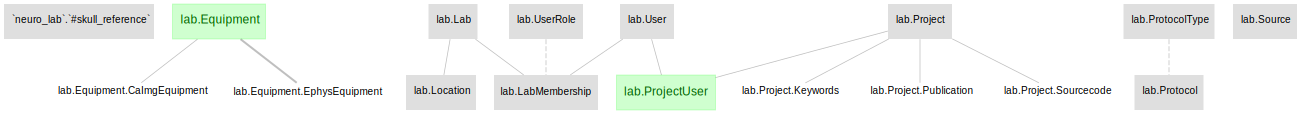

In [5]:
dj.Diagram(lab)

In [6]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject3,F,2020-12-30,test animal
subject4,M,2021-02-12,test animal
subject5,F,2020-01-03,lmash_E105
subject6,M,2020-01-03,hneih_E105
subject7,U,2020-08-30,test animal
subject8,F,2020-09-30,test animal


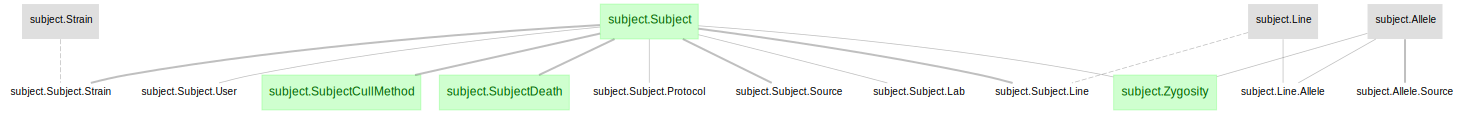

In [7]:
dj.Diagram(subject)

In [8]:
session.Session()

subject,session_datetime
subject3,2021-04-30 12:22:15.032000
subject5,2020-04-15 11:16:38
subject6,2021-01-15 11:16:38
subject6,2021-06-02 14:04:22


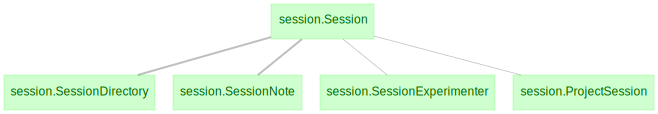

In [9]:
dj.Diagram(session)

(Workflow needs continued development to import geotyping tables)

In [10]:
# dj.Diagram(genotyping) + dj.Diagram(subject.Subject) + dj.Diagram(subject.Allele)
## Not yet defined

## Explore each table

DataJoint provide tools to explore table definitions and table contents.

In [11]:
# check table definition with describe()
subject.Subject.describe();

# Animal Subject
subject              : varchar(32)                  
---
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



In [12]:
# check table definition with dependencies with describe()
subject.Zygosity.describe();

-> subject.Subject
-> subject.Allele
---
zygosity             : enum('Present','Absent','Homozygous','Heterozygous') # zygosity



In [13]:
# check the name of every attribute with heading, 
# which will spell out the foreign key definition inherited from another table
subject.Zygosity.heading

# 
subject              : varchar(32)                  # 
allele               : varchar(32)                  # abbreviated allele name
---
zygosity             : enum('Present','Absent','Homozygous','Heterozygous') # zygosity

## Insert data into Manual and Lookup tables

Tables in this workflow are either manual tables or lookup tables. To insert into these tables, DataJoint provide method `.insert1()` and `insert()`.

In [14]:
# `insert1()` takes a dict or a tuple
subject.Subject.insert1(
    dict(subject='subject1', sex='M', subject_birth_date='2020-12-30', 
         subject_description='test animal'))
subject.Subject.insert1(
    ('subject2', 'F', '2020-11-30', 'test animal'))

DuplicateError: ("Duplicate entry 'subject1' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [19]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject5,F,2020-01-03,lmash_E105
subject6,M,2020-01-03,hneih_E105


In [21]:
# `insert()` takes a list of dicts or tuples
subject.Subject.insert(
    [dict(subject='subject3', sex='F', subject_birth_date='2020-12-30', 
          subject_description='test animal'),
     dict(subject='subject4', sex='M', subject_birth_date='2021-02-12', 
          subject_description='test animal')
    ]
)
subject.Subject.insert(
    [
        ('subject7', 'U', '2020-08-30', 'test animal'),
        ('subject8', 'F', '2020-09-30', 'test animal')
    ]
)

In [22]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject3,F,2020-12-30,test animal
subject4,M,2021-02-12,test animal
subject5,F,2020-01-03,lmash_E105
subject6,M,2020-01-03,hneih_E105
subject7,U,2020-08-30,test animal
subject8,F,2020-09-30,test animal


For more documentation of insert, please refer to [DataJoint Docs](https://docs.datajoint.io/python/manipulation/1-Insert.html) and [DataJoint playground](https://playground.datajoint.io/)

## Insert into Manual and Lookup tables with Graphical User Interface

DataJoint Neuro also provides a Graphical User Interface [DataJoint Labbook](https://github.com/datajoint/datajoint-labbook) to support manual data insertions into DataJoint workflows.
  
![DataJoint Labbook preview](../images/DataJoint_Labbook.png)